In [1]:
import ballmapper as bm

In [2]:
import numpy as np
import pandas as pd

import networkx as nx

from matplotlib import pyplot as plt

In [3]:
pointcloud = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(pointcloud, columns=['x', 'y'])
points_df.head()


,x,y
0,1.000000,0.000000
1,0.995004,0.099833
2,0.980067,0.198669
3,0.955336,0.295520
4,0.921061,0.389418


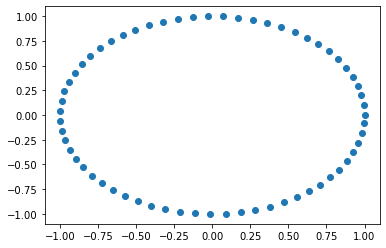

In [4]:
plt.scatter(points_df.x, points_df.y)

## Standard BM

In [5]:
%%time
standard_BM = bm.BallMapper(points_df.values, # the pointcloud, as a numpy array
                            points_df.y.values, # a array with the coloring function
                            0.25,
                            interface='standard') # the radius of the balls


CPU times: user 623 µs, sys: 330 µs, total: 953 µs
Wall time: 1.63 ms


+++++++++BallMapperCppInterfacePython+++++++++
Number of points : 63
values.size() : 63
Entering compute_landmarks.
landmarks.size() : 21
Here are the landmarks: 
1 , 4 , 7 , 10 , 13 , 16 , 19 , 22 , 25 , 28 , 31 , 34 , 37 , 40 , 43 , 46 , 49 , 52 , 55 , 58 , 61 , coverage.size() : 63
Entering internal_procedure_fill_points_covered_by_landmarks.
points_covered_by_landmarks.size() : 21
Entering internal_procedure_fill_coloring.
Entering internal_procedure_build_graph.
creating vector of edges.
+++++++++ THE END +++++++++



In [6]:
# standard_BM.landmarks

In [7]:
standard_BM.edges

[(1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (1, 21),
 (20, 21)]

In [8]:
# standard_BM.points_covered_by_landmarks

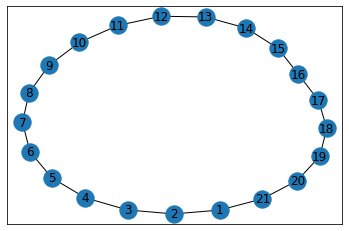

In [9]:
G = nx.Graph()
G.add_edges_from(standard_BM.edges)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=24))

## Equivariant BM WHY IS NOT RETURNIN THE SAME GRAPH?
## Landmarks are different

the bug is in compute_landmarks_not_transposed_pts_group_action

In [10]:
orbit = [ [i,] for i in range(1, len(points_df)+1)] # trivial orbit

In [11]:
%%time
equivariant_BM = bm.BallMapper(points_df.values, # the pointcloud, as a numpy array
                               points_df.y.values, # a array with the coloring function
                               0.25, # the radius of the balls
                               orbit = orbit, interface = 'equivariant') 


CPU times: user 1.51 ms, sys: 808 µs, total: 2.32 ms
Wall time: 4.75 ms


+++++++++SimplifiedBallMapperCppInterfaceGroupActionAndSparseRepresentationPython+++++++++

Number of points : 63
orbit.size() : 63
values.size() : 63
Entering compute_landmarks_not_transposed_pts_group_action.
landmarks.size() : 25
Here are the landmarks: 
1 , 2 , 5 , 6 , 8 , 10 , 11 , 14 , 19 , 20 , 23 , 24 , 26 , 29 , 32 , 34 , 35 , 38 , 41 , 44 , 49 , 51 , 53 , 54 , 59 , coverage.size() : 63
Entering internal_procedure_fill_points_covered_by_landmarks.
points_covered_by_landmarks.size() : 25
Entering internal_procedure_fill_coloring.
Entering internal_procedure_build_graph.
creating list of edges.
+++++++++ THE END +++++++++



In [12]:
equivariant_BM.edges

[(1, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (7, 8),
 (2, 10),
 (10, 12),
 (11, 13),
 (13, 14),
 (14, 15),
 (2, 16),
 (10, 16),
 (15, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (2, 22),
 (16, 22),
 (1, 24),
 (22, 24)]

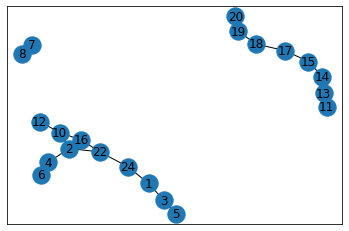

In [13]:
G = nx.Graph()
G.add_edges_from(equivariant_BM.edges)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=24))